In [71]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import mnlogit

In [85]:
data = pd.read_csv("/Users/carriemagee/Downloads/DATS6103-FinalProject/Datasets/cleaned_data_1.csv")

In [98]:

data = data.rename(columns= {"Physical Activity":"physical_activity",
                            "Vape Use":"vape_use",
                            "Electronic Devices":"electronic_devices"})

data.head()

,Unnamed: 0,index,year,bmi,vape_use,physical_activity,Television,electronic_devices,Grades,race,sex
0,0,189025,2017,23.8568,2,0,0.0,0.0,1,1,2
1,1,189027,2017,20.5889,2,0,0.0,0.0,1,3,2
2,2,189034,2017,24.3287,2,0,0.0,0.0,1,3,2
3,3,189059,2017,21.7930,1,0,0.0,0.0,1,1,2
4,4,189060,2017,21.5209,2,0,0.0,0.0,1,3,2


In [92]:
#recoding television from factors to numeric
data["Television"]=data["Television"].replace([1,2,3,4,5,6,7],[0,0.5,1,2,3,4,5])
data.head()

,Unnamed: 0,index,year,bmi,vape_use,physical_activity,Television,Electronic Devices,Grades,race,sex
0,0,189025,2017,23.8568,2,0,0.0,1,1,1,2
1,1,189027,2017,20.5889,2,0,0.0,1,1,3,2
2,2,189034,2017,24.3287,2,0,0.0,1,1,3,2
3,3,189059,2017,21.7930,1,0,0.0,1,1,1,2
4,4,189060,2017,21.5209,2,0,0.0,1,1,3,2


In [99]:
#recoding electronic devices from factors to numeric
data["electronic_devices"]=data["electronic_devices"].replace([1,2,3,4,5,6,7],[0,0.5,1,2,3,4,5])
data.head()

,Unnamed: 0,index,year,bmi,vape_use,physical_activity,Television,electronic_devices,Grades,race,sex
0,0,189025,2017,23.8568,2,0,0.0,0.0,1,1,2
1,1,189027,2017,20.5889,2,0,0.0,0.0,1,3,2
2,2,189034,2017,24.3287,2,0,0.0,0.0,1,3,2
3,3,189059,2017,21.7930,1,0,0.0,0.0,1,1,2
4,4,189060,2017,21.5209,2,0,0.0,0.0,1,3,2


In [94]:
#recoding physical activity from factors to numeric
data["physical_activity"]=data["physical_activity"].replace([1,2,3,4,5,6,7],[0,1,2,3,4,5,6])
data.head()

,Unnamed: 0,index,year,bmi,vape_use,physical_activity,Television,Electronic Devices,Grades,race,sex
0,0,189025,2017,23.8568,2,0,0.0,0.0,1,1,2
1,1,189027,2017,20.5889,2,0,0.0,0.0,1,3,2
2,2,189034,2017,24.3287,2,0,0.0,0.0,1,3,2
3,3,189059,2017,21.7930,1,0,0.0,0.0,1,1,2
4,4,189060,2017,21.5209,2,0,0.0,0.0,1,3,2


In [100]:
data["electronic_devices"].value_counts()

0.0    14275
0.5     3291
1.0      313
2.0       73
3.0       52
Name: electronic_devices, dtype: int64

In [101]:
#recoding data for logit regression
xdata = data[["bmi","physical_activity","Television","electronic_devices","Grades","race","sex"]]
print(xdata.head())
ydata = data[["vape_use"]]
print(ydata.head())

       bmi  physical_activity  Television  electronic_devices  Grades  race  \
0  23.8568                  0         0.0                 0.0       1     1   
1  20.5889                  0         0.0                 0.0       1     3   
2  24.3287                  0         0.0                 0.0       1     3   
3  21.7930                  0         0.0                 0.0       1     1   
4  21.5209                  0         0.0                 0.0       1     3   

   sex  
0    2  
1    2  
2    2  
3    2  
4    2  
   vape_use
0         2
1         2
2         2
3         1
4         2


In [102]:
model2 = mnlogit(formula="vape_use ~ bmi + physical_activity + Television + electronic_devices + C(Grades)+ C(race)+ C(sex)",data=data)
model2Fit = model2.fit()
print(model2Fit.summary())

         Current function value: 0.811458
         Iterations: 35


/Users/carriemagee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:               vape_use   No. Observations:                18004
Model:                        MNLogit   Df Residuals:                    17934
Method:                           MLE   Df Model:                           65
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                 0.04862
Time:                        23:35:17   Log-Likelihood:                -14609.
converged:                      False   LL-Null:                       -15356.
Covariance Type:            nonrobust   LLR p-value:                4.187e-269
        vape_use=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6911      0.077      9.016      0.000       0.541       0.841
C(Grades)[T.2]         0.3618      0.076      4.758      0.000       0.213       0.511
C(Grades)[T.3]      

In [15]:
#recoding race from numeric to categorical
data["race"]=data["race"].replace([1,2,3,4],["White","Black or African American","Hispanic/Latino","All Other Races"])
data.head()

,Unnamed: 0,index,year,bmi,Vape Use,Physical Activity,Television,Electronic Devices,Grades,race,sex
0,0,189025,2017,23.8568,2,1,1,1,1,White,2
1,1,189027,2017,20.5889,2,1,1,1,1,Hispanic/Latino,2
2,2,189034,2017,24.3287,2,1,1,1,1,Hispanic/Latino,2
3,3,189059,2017,21.7930,1,1,1,1,1,White,2
4,4,189060,2017,21.5209,2,1,1,1,1,Hispanic/Latino,2


In [16]:
#recoding grades from numeric to categorical
data["Grades"]=data["Grades"].replace([1,2,3,4,5,6,7],["Mostly A's","Mostly B's","Mostly C's","Mostly D's","Mostly F's","None of these grades","Not sure"])
data.head()

,Unnamed: 0,index,year,bmi,Vape Use,Physical Activity,Television,Electronic Devices,Grades,race,sex
0,0,189025,2017,23.8568,2,1,1,1,Mostly A's,White,2
1,1,189027,2017,20.5889,2,1,1,1,Mostly A's,Hispanic/Latino,2
2,2,189034,2017,24.3287,2,1,1,1,Mostly A's,Hispanic/Latino,2
3,3,189059,2017,21.7930,1,1,1,1,Mostly A's,White,2
4,4,189060,2017,21.5209,2,1,1,1,Mostly A's,Hispanic/Latino,2


In [17]:
data.Grades.value_counts()

Mostly A's              15726
Mostly B's               1087
Mostly C's                597
Mostly D's                260
None of these grades      199
Mostly F's                135
Name: Grades, dtype: int64

In [18]:
data.race.value_counts()

White                        8654
Hispanic/Latino              4335
Black or African American    2888
All Other Races              2127
Name: race, dtype: int64

In [25]:
#creating a contingency table for race and grades
contigency = pd.crosstab(index=data['race'], columns=data['Grades'], margins=True, margins_name="Total")

<AxesSubplot:xlabel='Grades', ylabel='race'>

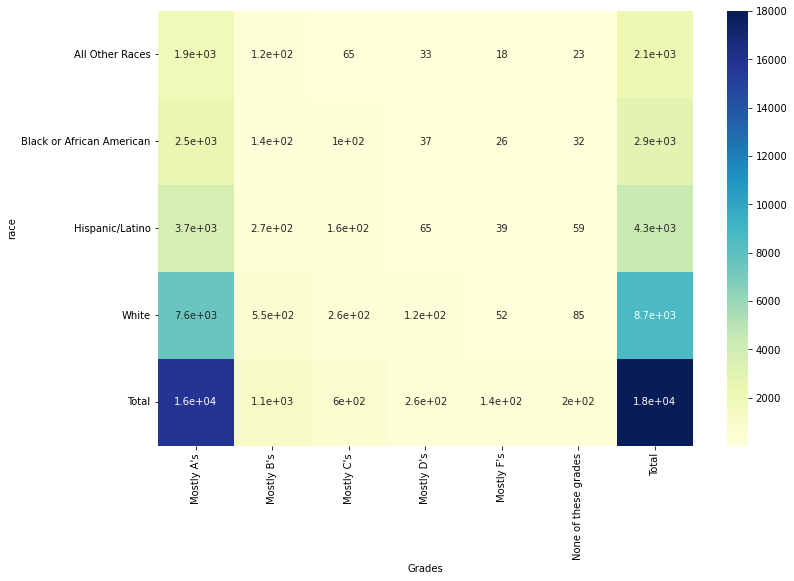

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [30]:
#chi-squared test of independence
stat, p, dof, expected = chi2_contingency(contigency)
print(p)
#checking the significance
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

0.4688071761448416
p value is 0.4688071761448416
Independent (H0 holds true)
